## <font color=red> Problem Statement
Predict the percentage of student based on the number of study hours using a Simple Linear Regression Model

## <font color=red> Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## <font color=red> Step 1: Reading and Understanding Data

In [3]:
# load dataset
scores = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
# display top 5 rows
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# shape of df
scores.shape

(25, 2)

In [6]:
# information about df
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# statisitical analysis of numeric columns
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


> **Insights:**
- There are 25 rows and 2 columns
- Data type of columns: 1 float type and 1 int type

## <font color=red> Step 2: Data Cleaning

#### <font color=blue> NULL values

In [8]:
# check for null values
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

> **Insights:**
- No NULL values present 

#### <font color=blue> Outliers

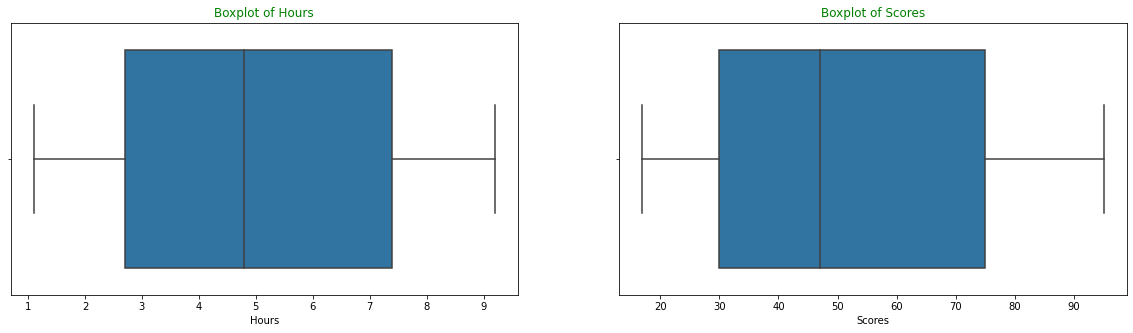

In [9]:
# plot boxplot to check for outliers

plt.figure(figsize=(20,5))
for i,v in enumerate(scores.columns):
    plt.subplot(1,2,i+1)
    sns.boxplot(scores[v])
    plt.title(f'Boxplot of {v}', color='g')

> **Insights:**
- No outliers present

## <font color=red> Step 3: Data Visualisation

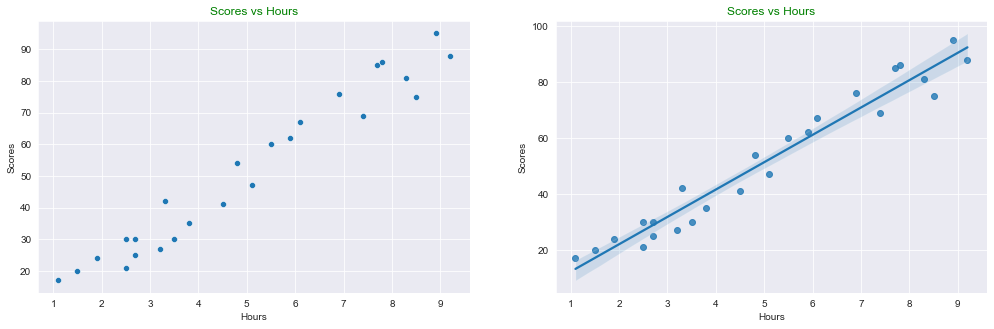

In [10]:
plt.figure(figsize=(17,5))

sns.set_style('darkgrid')

# line plot
plt.subplot(1,2,1)
plt.title('Scores vs Hours', color='g')
sns.scatterplot(data=scores, x='Hours', y='Scores')

# reg plot
plt.subplot(1,2,2)
plt.title('Scores vs Hours', color='g')
sns.regplot(data=scores, x='Hours', y='Scores')
plt.show()

> **Insights:**
- We can clearly see there is a linear relation between the target variable (i.e. Scores) and independent variable (i.e. Hours)
- Thus we can go ahead with building a Simple Linear Regression Model

## <font color=red> Step 4: Data Preparation

### <font color=blue> Split data into X and y
We divide the data into 
- Target variable('Scores') denoted by y 
- Independent variable('Hours') denoted by X

In [11]:
# divide data into X and y
X = scores['Hours']
y = scores['Scores']

### <font color=blue> Divide into train and test data
We divide the data into train and test data using Scikit-Learn's train_test_split method in the ratio 80:20

In [12]:
# dividing into test and train data set

# import library
from sklearn.model_selection import train_test_split

# test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# converting into 2-D array

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

## <font color=red> Step 5: Building the Model

### <font color=blue> Training the Algorithm

In [14]:
# import library
from sklearn.linear_model import LinearRegression

# create object 
lr = LinearRegression()

# fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
print(lr.coef_, lr.intercept_)

[9.91065648] 2.018160041434662


The equation we get is:

$ Scores = 9.91*Hours + 2.01 $

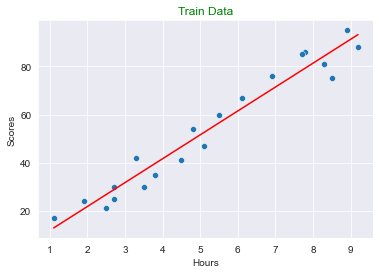

In [16]:
# plotting the regression line
line = lr.coef_*X_train + lr.intercept_

sns.scatterplot(X_train[:,0], y_train)
sns.lineplot(X_train[:,0], line[:,0], color='r')
plt.xlabel('Hours')
plt.title('Train Data', color='g')
plt.show()

## <font color=red> Step 6: Residual Analysis

### <font color=blue>Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and qqplot and see what it looks like.

In [17]:
# creating y_pred using the 
y_train_pred = lr.predict(X_train)

# creating residual array
res = y_train - y_train_pred

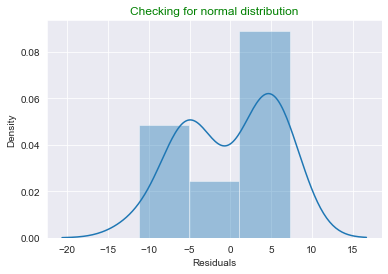

In [18]:
# plot the histogram for residuals to check for type of distribution

sns.distplot(res)
plt.title('Checking for normal distribution', color='g')
plt.xlabel('Residuals')
plt.show()

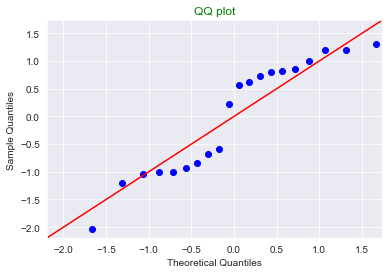

In [19]:
import statsmodels.api as sm
import scipy.stats as stats

sm.qqplot(data=res,line='45', fit=True, dist=stats.norm)
plt.title('QQ plot', color='g')
plt.show()

> **Insights:**
- We can see the residuals dont't exactly follow normal distribution
- In such a scenario we can go for transformation of X variable (log, square root, cube root)
- However, in our case we will go ahead without applying transformation

### <font color=blue> Homoscedasticity
We need to check if residuals have constant variance at every level of x

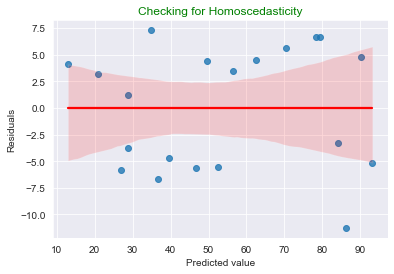

In [20]:
# plot a scatterplot between residuals vs y_pred

sns.regplot(x= y_train_pred, y=res, line_kws={'color':'red'})
plt.title('Checking for Homoscedasticity', color='g')
plt.ylabel('Residuals')
plt.xlabel('Predicted value')
plt.show()

> **Insights:**
We can see almost constant variance of residuals here 

## <font color=red> Step 7: Making predictions

In [21]:
# making predictions on the test data
y_test_pred = lr.predict(X_test)

In [22]:
# comparing actual and predicted on the test data
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [23]:
# making prediction on the value of 9.25 hours
hours = np.array(9.25)
pred = lr.predict(hours.reshape(-1,1))
print('Predicted score for 9.25 hours:',pred[0])

Predicted score for 9.25 hours: 93.69173248737539


## <font color=red> Step 8: Evaluation

### <font color=blue> RMSE and Mean Absolute Error

In [24]:
# import library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Root Mean Squared Error for train data:', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2))
print('Root Mean Squared Error for test data:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))

print('Mean Absolute Error for train data:', round(mean_absolute_error(y_train, y_train_pred), 2))
print('Mean Absolute Error for test data:', round(mean_absolute_error(y_test, y_test_pred), 2))

Root Mean Squared Error for train data: 5.56
Root Mean Squared Error for test data: 4.65
Mean Absolute Error for train data: 5.19
Mean Absolute Error for test data: 4.18


### <font color=blue> R-squared score

In [25]:
# import library
from sklearn.metrics import r2_score

# calculate r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# display the scores
print('R2 score for train data:',round(r2_train,2))
print('R2 score for test data:',round(r2_test,2))

R2 score for train data: 0.95
R2 score for test data: 0.95


### <font color=blue> Visualising fit

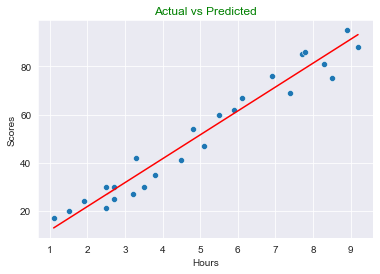

In [26]:
# plotting the regression line
line = lr.coef_*X + lr.intercept_

sns.scatterplot(X, y)
sns.lineplot(X, line, color='r')
plt.title('Actual vs Predicted', color='g')
plt.show()